In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

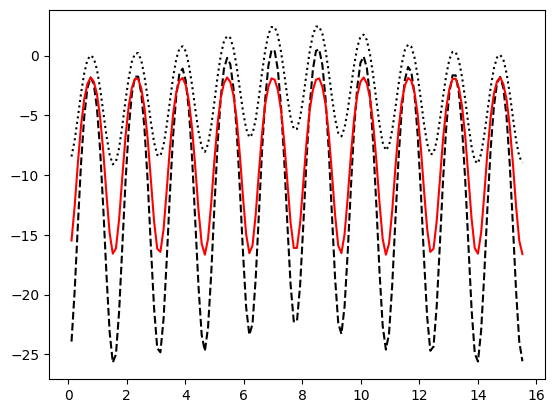

In [14]:
rydberg = 13.60569253
v_qn1_xsf = pd.read_table('', sep=' ')
v_qn1_xsf.columns = ['dist','volt']

v_q0_xsf = pd.read_table('/', sep=' ')
v_q0_xsf.columns = ['dist','volt']

v_model = pd.read_table('', sep=' ')
v_model.columns = ['dist','volt']
plt.plot(v_diff['dist'],v_diff['volt'],color='k',linestyle=":",label=f"$(V_p)$",zorder=2)

plt.plot(v_qn2_xsf['dist'],v_qn2_xsf['volt'],color='k',linestyle="--",label=f"$(V_p)$",zorder=2)
plt.plot(v_q0_xsf['dist'],v_q0_xsf['volt'],color='r',label=f"$(V_p)$")
#plt.plot(v_q0_xsf['dist'],v_qn2_xsf['volt']-v_q0_xsf['volt'],color='b',label=f"$(V_p)$")
#plt.plot(v_q0_xsf['dist'],v_qn1_xsf['volt']-v_q0_xsf['volt'],color='b',label=f"$(V_p)$")
#plt.plot(v_model['dist'],v_model['volt'],color='b',label=f"$(V_p)$")
#plt.plot(1.88973*v_qn1_xsf['dist'],v_qn1_xsf['volt'],color='r',label=f"$(V_o)$")
#plt.plot(v_model['dist'],v_model['volt'],color='r',label=f"$(V_m)$")
#plt.plot(v_p['dist'],(v_0['volt']-v_p['volt']),color='b',label=f"$(V_p)$")

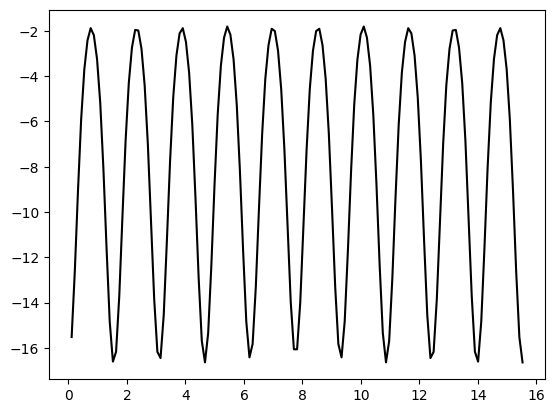

In [5]:
v_qn1_xsf_oldCoffee = pd.read_table('/Users/andrewtimmins/Documents/CMU/Research/QE_ASE/dsProject/Testing/ALN/ALN_tutorial_2/supercells/VAC_1/-1/plavg_a1_xsf_Coffee.plot', sep=' ')
v_qn1_xsf_oldCoffee.columns = ['dist','volt']

plt.plot(v_qn1_xsf_oldCoffee['dist'],v_qn1_xsf_oldCoffee['volt'],color='k',label=f"$(V_p)$")

In [37]:
dV0p = pd.read_table('coffee_dV0p_voltage_diff_a1.plot', sep=' ')
dV0p.columns = ['dist','volt']
a1_length = 2.64323522*(1/0.1875)
defect_coord = 0.88107841
charge = -2

In [13]:
farthest_point_from_defect = determine_farthest_point_in_cell(defect_coord,dV0p['dist'])
farthest_point_from_defect
voltage_value = np.interp(farthest_point_from_defect,dV0p['dist'],dV0p['volt'])
print(f"voltage_value: {voltage_value}")

Farthest coordinate from defect: 7.888078409999999
voltage_value: 0.1063933666240783


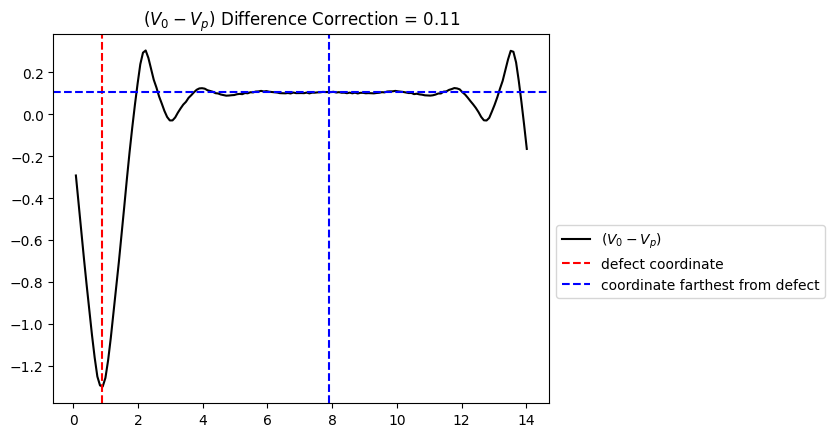

In [91]:
plt.plot(dV0p['dist'],dV0p['volt'],color='k',label=f"$(V_0-V_p)$")
plt.axvline(x=defect_coord,color='red',linestyle='--',label='defect coordinate')
plt.axvline(x=farthest_point_from_defect,color='blue',linestyle='--',label='coordinate farthest from defect')
plt.axhline(y=voltage_value,color='blue',linestyle='--')
#plt.text(x=farthest_point_from_defect,y=0,s=f"Voltage diff: {voltage_value:.3f}")
plt.title(f"$(V_0-V_p)$ Difference Correction = {voltage_value:.2f}")
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.gca()
plt.show()
#plt.savefig('/Users/andrewtimmins/Desktop/coffee_dvmD_correction.png',bbox_inches='tight',pad_inches=1)

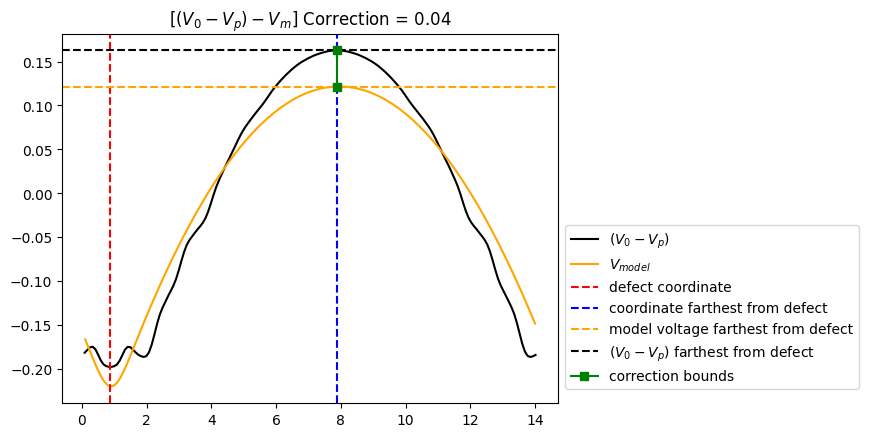

In [86]:
            #Run dV_mD.py


#Plot dv_0p
dVmD_model = pd.read_table('coffee_dVmD_model_a1.plot', sep=' ')
dVmD_model.columns = ['dist','volt']
dVmD_vdiff = pd.read_table('coffee_dVmD_voltage_diff_a1.plot', sep=' ')
dVmD_vdiff.columns = ['dist','volt']
dVmD_vdiff['volt'] = dVmD_vdiff['volt']*get_sign_of_charge(charge)

voltage_model = np.interp(farthest_point_from_defect,dVmD_model['dist'],dVmD_model['volt'])
voltage_vdiff = np.interp(farthest_point_from_defect,dVmD_vdiff['dist'],dVmD_vdiff['volt'])
dV_q0m_correction = voltage_vdiff - voltage_model

plt.plot(dVmD_vdiff['dist'],dVmD_vdiff['volt'],color='k',label=f"$(V_0-V_p)$")
plt.plot(dVmD_model['dist'],dVmD_model['volt'],color='orange',label="$V_{model}$")
plt.axvline(x=defect_coord,color='red',linestyle='--',label='defect coordinate')
plt.axvline(x=farthest_point_from_defect,color='blue',linestyle='--',label='coordinate farthest from defect')

#plt.axhline(y=dV_q0m_correction,color='blue',linestyle='--',label='loc farthest from defect')
plt.axhline(y=voltage_model,color='orange',linestyle='--',label='model voltage farthest from defect')
plt.axhline(y=voltage_vdiff,color='k',linestyle='--',label=f"$(V_0-V_p)$ farthest from defect")
plt.plot([farthest_point_from_defect,farthest_point_from_defect],
         [voltage_model,voltage_vdiff],marker = 's',color='green',label="correction bounds")
#plt.plot(farthest_point_from_defect, farthest_point_from_defect,marker = 'o',color='k')

plt.title(f"$[(V_0-V_p)-V_m]$ Correction = {dV_q0m_correction:.2f}")
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.gca()
plt.savefig('/Users/andrewtimmins/Desktop/coffee_dvmD_correction.png',
            bbox_inches='tight',pad_inches=1)


In [6]:
def determine_farthest_point_in_cell(defect_coordinate,cell_distances):
    cell_length = cell_distances.max()
    max_seperation = cell_length/2

    ideal_1 = defect_coordinate - max_seperation
    if(ideal_1 > cell_distances.min() and ideal_1 < cell_length):
        print(f"Farthest coordinate from defect: {ideal_1}")
        return ideal_1
    else:
        ideal_2 = defect_coordinate + max_seperation
        print(f"Farthest coordinate from defect: {ideal_2}")
        return ideal_2

In [31]:
def get_sign_of_charge(charge):
    if charge != 0:
        return abs(charge)/charge
    else:
        return 0

In [34]:
print(get_sign_of_charge(-5))

-1.0
